# Missing Value Imputation Using Multiple Imputation by Chained Equations (MICE)

## Background

In Data Science workflows, a pre-processing task is required which includes data cleaning to ensure data quality before the analysis process. One of the problems that are often encountered in the data cleaning process is missing values. Most available algorithms for analyzing datasets in the feature selection process and classification or estimation process analyze complete datasets. Missing value can bias the results of the machine learning models or reduce the accuracy of the model. Therefore, the missing value is resulted the analysis results has an undesirable effect. 

From Little and Rubin on the [Journal Article](https://doi.org/10.2307/1165119), there are three main types of missing data: 
- **Missing Completely at Random (MCAR)** is a type of missing value where the distribution of missing data does not depend on observation data or missing value data.
- **Missing at Random (MAR)** is a type of missing value where the distribution of missing data depends on the observed data, but does not depend on the missing value data.
- **Not Missing at Random (NMAR)** is a type of missing value where the distribution of missing data depends on the missing value data. In other words, missingness is non-ignorable. The occurrence of missing data in a variable is related to the variable itself, so it cannot be predicted from other variables in a dataset.


Missing Value Imputation (MVI) is the most commonly used solution method for dealing with incomplete dataset problems. In general, MVI is a process for dealing with missing values where replacements for missing values are found through statistical techniques or machine learning. However, the main limitation of using statistical imputation with a measure of central tendency is that it leads to biased estimates of variance and covariance. Therefore, techniques with machine learning emerged as another alternative to overcome the weaknesses of statistical methods. One of the machine learning algorithms in the imputation technique is MICE. 


## Multiple Imputation by Chained Equations (MICE)

**MICE (Multiple Imputation by Chained Equations)** is Multiple imputation which is recognized as a leading strategy for inserting missing epidemiological data due to its ease of implementation and ability to maintain unbiased effect estimates and valid inferences [(Ref)](https://onlinelibrary.wiley.com/doi/10.1002/sim.8468). So, MICE performs multiple regression for imputing. 

MICE is a method of multiple imputation where missing values are filled in several times to create a complete data set. MICE is an imputation method that works with the assumption that the missing data is **Missing at Random (MAR)**. This means that the missing data properties are related to the observed data but not the missing data. So that the imputation process involves information from other observation columns. The MICE algorithm works by running a multiple regression model and each missing value is modeled conditionally depending on the observed (not missing) value.

The main characteristic of MICE is that it performs multiple imputations using a chained equations approach. Multiple Imputations is able to take into account statistical uncertainty in imputation. While the chain equation approach is very flexible and can handle variables of various types (continuous or binary) as well as complexities such as limits.

The following are the steps of the MICE technique:

**Step 1**: All missing values are initially filled in by the usual statistical methods (eg mean for numeric, mode for categorical). This imputation can be considered a "place holders" (temporary value).

**Step 2:** Gradually, one by one column will be returned to NA. Set back to missing starts on the variable (“var”) with the least number of missing values.

**Step 3:** “var” is the dependent variable in the regression/classification model and all other variables are independent variables in the regression model.

**Step 4:** The missing values for “var” are then replaced with predictions (imputations) from the regression model. When "var" is subsequently used as an independent variable in a regression model for another variable, both this observed value and the calculated value will be used.

**Step 5:** Move to the next variable with the next fewest missing values, repeating steps 2–4 then for each variable that has missing data. Cycle through each variable constitutes one iteration or "cycle." At the end of one cycle, all missing values have been replaced with predictions from the regression that reflect the observed relationships in the data. The idea is that at the end of the cycle, the distribution of parameters governing imputation (eg, coefficients in a regression model) should converge in the sense of being stable.

Based on its performance, this MICE builds the potential of the imputation method which is able to produce predictive values that are closer to the original value. However, examining the strength of the techniques is important to help understand its characteristics.

## Objectives

Overall, this project offers three objectives and contributions as follows:

   1. Apply missing data imputation using MICE
   2. Comparing the MICE performance with statistical method imputation 
   3. Analyze the MICE performance on the Missing at Random for numeric and categorical data

## Dataset

Determining the dataset in this project is very crucial so that the expected analysis is in accordance with the needs of real-world cases.

As for some of the constraints that exist in the selection of data are as follows:
- **There is a correlation between one column and another**
As we know that the assumption of data in the MICE technique is Missing at Random (MAR). This means that the value in a missing column can be explained by another column. So the dataset used must have a correlation between columns so that MICE can work according to its characteristics.
- **There are contain the numeric and categorical columns**
This project wants to see how MICE performs in predicting missing values in numeric and categorical data. This is one of the additional characteristics of the required dataset, namely the presence of numeric and categorical columns. Where the column must have a correlation with other columns in the data.
- **When implementation in the real world allows for missing values during measurement**
Another important thing in selecting a dataset is the potential for the data to be empty. So that this project is really able to describe the business problems that occur. Medical data is known to usually have missing values [(Ref)](https://www.mdpi.com/2073-8994/12/11/1792). Especially the presence of personal data that makes the patient or subject uncomfortable to answer the question actually. So, this project will use data that contain personal information related to health.


Referring to the dataset requirements, this project uses a health dataset obtained from UCI Machine Learning [(Link Dataset)](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+). 

#### Dataset: Estimation of obesity levels based on eating habits and physical condition Data Set

Dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. In recent decades, there has been increasing concern about obesity in adolescents and adults. Obesity can cause many physical health problems and affect people’s quality of life. So people are starting to look at the factors that lead to obesity and predict the emergence of obesity. This data contains 17 attributes and 2111 records.

**Attributes related with eating habits are:**
- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables (FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC)

**Attributes related with the physical condition are:**
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)

**Other variables were:**
Gender, Age, Height and Weight.

**Class variable:** 
NObesity was created with the values of: 
- Insufficient Weight
- Normal Weight
- Overweight Level I
- Overweight Level II
- Obesity Type I
- Obesity Type II
- Obesity Type III

## Import Libraries 

The first stage in this analysis process is to prepare any libraries that can help us in processing the data. The following is a list of libraries that will be used:
- `pandas` : data reading, table aggregation, data manipulation, and other data analysis processes
- `numpy` : perform mathematical and logical operations
- `random` : perform random values for the process needs to artificially create missing values
- `matplotlib.pyplot` : create visualization to see the correlation value
- `seaborn` : making statistical graphics
- `sklearn.metrics` : measure prediction performance

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import random
from fancyimpute import IterativeImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

## Read Data

The data used is `obesity.csv` which has been stored in the `data` folder.The following code is reading the data using pandas then creating a preview for the dataset.

In [3]:
data_full = pd.read_csv('data/obesity.csv')
data_full.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Description of the Dataset:

- `Gender` : 1= female, 2 = male
- `Age` : numeric
- `Height` : numeric, in meters
- `Weight` : numeric, in kilograms
- `family_history_with_overweight` family history of obesity) : 1 = yes, 2 = no
- `FAVC` (frequent consumption of high caloric food): 1= yes, 2= no
- `FCVC` (frequency of consumption of vegetables: 1 = never, 2 = sometimes, 3 = always
- `NCP` (number of main meals): 1, 2, 3 or 4 meals a day
- `CAEC` (consumption of food between meals): 1=no, 2=sometimes, 3=frequently, 4=always
- `SMOKE` : 1= yes, 2= no
- `CH20` (consumption of water): 1 = less than a liter, 2 = 1–2 liters, 3 = more than 2 liters
- `SCC` (calorie consumption monitoring): 1= yes, 2 = no
- `FAF` (physical activity frequency per week): 0 = none, 1 = 1 to 2 days, 2= 2 to 4 days, 3 = 4 to 5 days
- `TUE` (time using technology devices a day): 0 = 0–2 hours, 1 = 3–5 hours, 2 = more than 5 hours
- `CALC` (consumption of alcohol): 1= never, 2 = sometimes, 3 = frequently, 4 = always
- `MTRANS` : 1 = automobile, 2 = motorbike, 3 = bike, 4 = public transportation, 5= walking
- `NObeyesdad` : Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III

Source : https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

## Exploratory Data Analysis

At this stage we will explore the data, including:
- check the data type in each column
- encoding label for the categorical column
- check correlation
- check the presence of missing values in the dataset

### Check Data Types

In [4]:
data_full.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

Based on checking the data types above, it was found that there were several data types on the variables that were not appropriate:
- `Gender`, `family_history_with_overweight`, `FAVC`, `CAEC`, `SMOKE`, `SCC`, `CALC`, `MTRANS`, `NObeyesdad` → should be category`

So, the next step is data type conversion.

In [5]:
kolom_category = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

data_full[kolom_category] = data_full[kolom_category].astype('category')

data_full.dtypes

Gender                            category
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight    category
FAVC                              category
FCVC                               float64
NCP                                float64
CAEC                              category
SMOKE                             category
CH2O                               float64
SCC                               category
FAF                                float64
TUE                                float64
CALC                              category
MTRANS                            category
NObeyesdad                        category
dtype: object

The data type conversion is successful and all data types are correct. However, in the category column, special treatment is needed, namely the encoding label. This approach converts each value in the column to a number. This needs to be done because the imputation technique with MICE requires all input and output variables to be numeric.

## Label Encoding for Category Variables

To make documentation of the value transformation, checking the unique value is conducted for column categories before and after encoding. This uses columns `family_history_with_overweight` as the sample.

In [6]:
data_full['family_history_with_overweight'].unique()

['yes', 'no']
Categories (2, object): ['no', 'yes']

In [7]:
data_full['Gender'] = data_full['Gender'].cat.codes
data_full['family_history_with_overweight'] = data_full['family_history_with_overweight'].cat.codes
data_full['FAVC'] = data_full['FAVC'].cat.codes
data_full['CAEC'] = data_full['CAEC'].cat.codes
data_full['SMOKE'] = data_full['SMOKE'].cat.codes
data_full['SCC'] = data_full['SCC'].cat.codes
data_full['CALC'] = data_full['CALC'].cat.codes
data_full['MTRANS'] = data_full['MTRANS'].cat.codes
data_full['NObeyesdad'] = data_full['NObeyesdad'].cat.codes

In [8]:
data_full['family_history_with_overweight'].unique()

array([1, 0], dtype=int8)

It can be seen that before encoding labels, the unique values in the `family_history_with_overweight` column are `Yes` and `No`. However, after encoding using the `.cat.codes` accessor, the unique values become `1` and `0`. This indicates that the encoding process was successfully executed.

## Check Correlation

Inspection of the correlation value is carried out to see how strong the relationship between the columns is. To answer whether a column can be explained by the value in another column. The correlation was done by Pearson method. The correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables. The values range between -1.0 and 1.0. A correlation of -1.0 shows a perfect negative correlation, while a correlation of 1.0 shows a perfect positive correlation. A correlation of 0.0 shows no linear relationship between the movement of the two variables.

<AxesSubplot:>

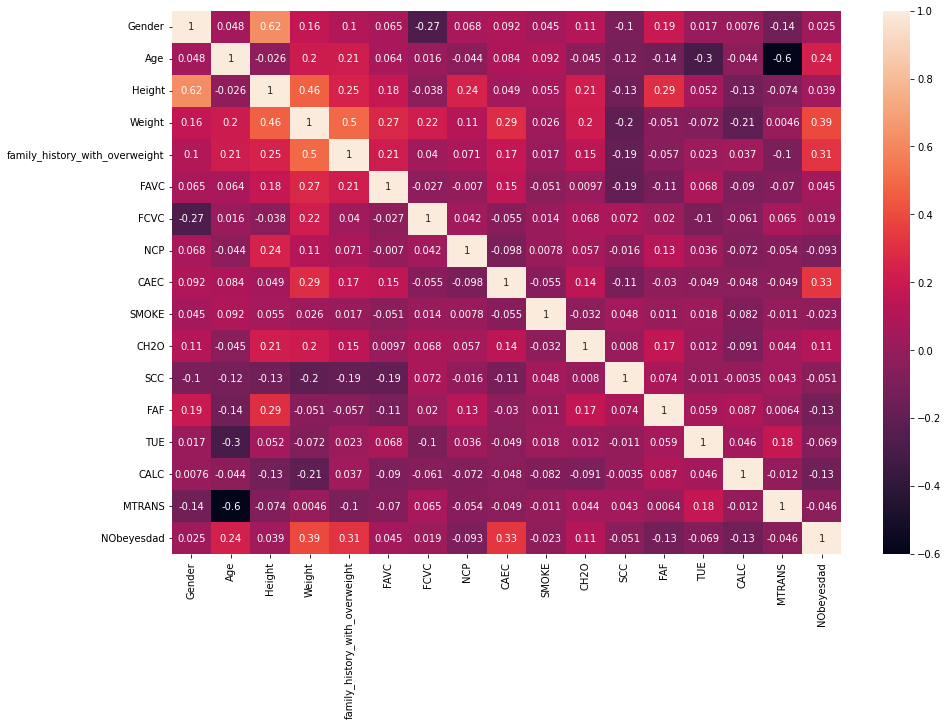

In [9]:
#Correlation matrix
data_full.corr()

#Correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data_full.corr(), annot = True)

Based on the result, in general there is no columns that directly have a strong relationship. There are several columns such as `Height` against `Gender`, `family_history_with_overweight` against `Weight`, and `MTRANS` against `Age ` which have a correlation above 0.5 so that it is indicated to have a relationship but not too strong.

But from a business perspective, we know that actually all the columns in the dataset affect the class variable, namely `NObeyesdad`.

### Check Missing Value on Original Dataset

Before data pre-processing, checking for missing values is carried out on the original dataset.

In [10]:
data_full.isnull().sum().sum()

0

There are no missing values in the full dataset.

## Data Preparation

There are steps to prepare data before performing missing data imputation. In the first place is removing the missing value in the original dataset. However, because the original dataset does not have a missing value, this step can be skipped.
Then next step is artificially create missing value, so that the imputation technique will be applied to fill in the values that are deliberately made empty. Basically, this step is to prepare the missing value in the dataset.

### Artificially Create Missing Value

In [11]:
data_full.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


Artificially create missing value will be conducted on the following columns:
- `age` → numeric
- `height` → numeric
- `family_history_with_overweight` → category

This column was chosen because it has the potential to be described by other columns. Referring to the correlation check, it was found that `age`, `height`, and `family_history_with_overweight` have other column pairs that can explain the missing values. Furthermore, it is also known from the literature study that the other columns are also interrelated.

First of all, create a new DataFrame with the name `data_mv` which is a copy of the DataFrame `data_full`. Then randomly generate 30% `NaN` using library `numpy`. 

Missing values created in the following columns: `age` (column 1), `height` (column 2), and `family_history_with_overweight` (column 4).

In [12]:
data_mv = data_full.copy()

random.seed(123)

ix = [(row, col) for row in range(data_mv.shape[0]) for col in range(data_mv.shape[1])]
for row, col in random.sample(ix, int(round(.3*len(ix)))):
    if (col ==  1) | (col == 2) | (col == 4):
        data_mv.iat[row, col] = np.nan

### Check Missing Values

The missing value check is again performed on `data_mv`.

In [13]:
data_mv.isnull().sum()

Gender                              0
Age                               625
Height                            638
Weight                              0
family_history_with_overweight    625
FAVC                                0
FCVC                                0
NCP                                 0
CAEC                                0
SMOKE                               0
CH2O                                0
SCC                                 0
FAF                                 0
TUE                                 0
CALC                                0
MTRANS                              0
NObeyesdad                          0
dtype: int64

Artificially created missing value was successfully carried out. Now there is a missing value in these columns:
- `Age` → 625 rows
- `Height` → 638 rows
- `family_history_with_overweight` → 625 rows

Calculates the percentage of the number of missing values by dividing the number of missing values by the length of `data_mv`.

In [14]:
data_mv.isnull().sum()/len(data_mv)

Gender                            0.000000
Age                               0.296068
Height                            0.302226
Weight                            0.000000
family_history_with_overweight    0.296068
FAVC                              0.000000
FCVC                              0.000000
NCP                               0.000000
CAEC                              0.000000
SMOKE                             0.000000
CH2O                              0.000000
SCC                               0.000000
FAF                               0.000000
TUE                               0.000000
CALC                              0.000000
MTRANS                            0.000000
NObeyesdad                        0.000000
dtype: float64

Overall, the percentage of each selected column has a missing value of approximately 30%.

## Imputation

After the missing value has been successfully created on purpose, the next step is to substitute the missing value with the imputation technique.

This project will perform imputation with 2 techniques, which are **Statistical and MICE**.

### Implement Statistical Imputation

Using statistical techniques by applying imputation with:
- Fill in the mean value in the numeric columns (`Age` and `Height`) 
- Fill in the mode value in the categorical column (`family_history_with_overweight`) 


In [15]:
# Copy data to obesity_statistical_imputed
obesity_statistical_imputed = data_mv.copy()

# convert NA Age with mean
obesity_statistical_imputed.Age = obesity_statistical_imputed.Age.fillna(obesity_statistical_imputed['Age'].mean())

# convert NA Height with mean
obesity_statistical_imputed.Height = obesity_statistical_imputed.Height.fillna(obesity_statistical_imputed['Height'].mean())

# convert NA family_history_with_overweight with modus
obesity_statistical_imputed['family_history_with_overweight'].fillna(obesity_statistical_imputed['family_history_with_overweight'].mode()[0], inplace=True)

Checking for missing values after imputing with statistical methods:

In [16]:
obesity_statistical_imputed.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

All missing values have been successfully imputed by statistical methods.

## Implement MICE

The implementation of MICE is done by using the `fancyimpute` library. `fancyimpute` uses all the column to impute the missing values. There are two ways missing data can be imputed using `fancyimpute` :
- KNN or K-Nearest Neighbor
- MICE or Multiple Imputation by Chained Equation

Documentation for `fancyimpute` : https://pypi.org/project/fancyimpute/

In `fancyimpute`, the MICE algorithm is named as `IterativeImputer`. The steps taken are:
- Copy `data_mv` to `obesity_mice_imputed`
- Initialize `IterativeImputer` with name `mice_imputer`
- Impute using `fit_transform` on data
- For categorical data `family_history_with_overweight`, round the imputed value

In [17]:
# Copy data to obesity_mice_imputed
obesity_mice_imputed = data_mv.copy()

# Initialize IterativeImputer
mice_imputer = IterativeImputer()

# Impute using fit_tranform on data
obesity_mice_imputed.iloc[:, :] = mice_imputer.fit_transform(obesity_mice_imputed)

# Using round for imputation value on categorical data
obesity_mice_imputed['family_history_with_overweight'] = (round(obesity_mice_imputed['family_history_with_overweight']))

Checking for missing values after imputing with MICE method:

In [18]:
obesity_mice_imputed.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

All missing values have been successfully imputed by MICE method.

## Check Performance 

In order to examine the performance of the imputation method, this project is using the **MSE** and **RMSE** values for numeric prediction, and **Accuracy** for category prediction. 

### MSE and RMSE
The Mean Squared Error (MSE) and the Root Mean Square Error (RMSE) are the standard statistical metrics used to evaluate models [(Ref)](https://gmd.copernicus.org/articles/7/1247/2014/).

- Mean Squared Error (MSE) is the average squared error between the actual value and the forecast value.
- Root Mean Square Error (RMSE) is the magnitude of the prediction error rate.

**MSE formula:**

$$
    MSE = \frac {1}{n} \sum^{n}_{i=1} (y_i - \hat{y_i})^2
$$

**RMSE formula:**

$$
    RMSE = \sqrt {\sum^{n}_{i=1} \frac {(y_i - \hat{y_i})^2} {n}}
$$

- $MSE$ = mean square error
- $RMSE$ = root mean square error
- $y$ = observed value
- $\hat{y_i}$= predicted result value
- $i$ = order of data in database
- $n$ = number of data

MSE and RMSE values are getting smaller and closer to 0 indicating more accurate prediction results.

Calculating MSE and RMSE values can be executed using the `sklearn.metrics` library which has a `mean_squared_error` function with a squared kwarg (defaults to `True`). Setting squared to `False` will return the `RMSE`.

### Accuracy

Accuracy is a metric that summarizes the performance of a classification or prediction model as the number of correct predictions divided by the total number of predictions. Measurements based on accuracy are more suitable and commonly used for assesing the prediction or imputation for categorical data [(Ref)](https://www.researchgate.net/publication/319251235_Performance_Analysis_of_Various_Missing_Value_Imputation_Methods_on_Heart_Failure_Dataset). Accuracy of 1 indicates a perfect accuracy, whereas the accuracy of 0 indicates a random guess.


**Accuracy Formula:**

$$
    Accuracy = \frac {Number of Correct Prediction} {Total Number of Predictions}
$$

Calculating accuracy scores can be executed using the `sklearn.metrics` library which has a `accuracy_score`.

### Check Performance for Statistical Imputation

Let's check the performance of the imputation missing value starting with the statistical imputation method. For performance measurement, the substitution of `height` and `age` values uses the MSE and RMSE values. As for `family_history_with_overweight` use the accuracy value.

In [19]:
#performance imputation for Height
mse_height_stats = mean_squared_error(data_full.Height, obesity_statistical_imputed.Height)
print(mse_height_stats) 

rmse_height_stats = mean_squared_error(data_full.Height, obesity_statistical_imputed.Height, squared=False)
print(rmse_height_stats)

0.0025511793359410885
0.05050920050783905


In [20]:
#performance imputation for Age
mse_age_stats = mean_squared_error(data_full.Age, obesity_statistical_imputed.Age)
print(mse_age_stats)

rmse_age_stats = mean_squared_error(data_full.Age, obesity_statistical_imputed.Age, squared=False)
print(rmse_age_stats)

13.065689619855316
3.61464930800421


In [21]:
# performance imputation for family_history_with_overweight
accuracy_score(data_full.family_history_with_overweight, obesity_statistical_imputed.family_history_with_overweight)

0.9398389388915206

### Check Performance MICE

Next is to carry out a performance assessment of value imputation using MICE.

In [22]:
#performance imputation for Height
mse_height_mice = mean_squared_error(data_full.Height, obesity_mice_imputed.Height)
print(mse_height_mice) 

rmse_height_mice = mean_squared_error(data_full.Height, obesity_mice_imputed.Height, squared=False)
print(rmse_height_mice)

0.0010379559663753416
0.03221732401015549


In [23]:
#performance imputation for Age
mse_age_mice = mean_squared_error(data_full.Age, obesity_mice_imputed.Age)
print(mse_age_mice)

rmse_age_mice = mean_squared_error(data_full.Age, obesity_mice_imputed.Age, squared=False)
print(rmse_age_mice)

6.928177454170077
2.632143129499245


In [24]:
#performance imputation for family_history_with_overweight
accuracy_score(data_full.family_history_with_overweight, obesity_mice_imputed.family_history_with_overweight)

0.9578398863098058

## Performance Analysis 

After calculating MSE,RMSE, and Accuracy to assess the prediction performance on each imputation method (Statistical and MICE), the following results are obtained:

![](data/statistical_summary.png)

![](data/mice_summary.png)

The result above shows that imputation with MICE constantly produces lower MSE and RMSE values than the Statistical method for columns  `Height` and `Age`.  As is known, the lower the MSE and RMSE values, the imputation value is closer to the actual value. Then the calculation of the accuracy value in `Family History` also shows a better accuracy scores which is reaching 96%. 

MICE successfully imputed well for all types of columns namely numeric (`Height`, `Age`) and categorical (`Family History`).

This shows that MICE is able to make better predictions by using information from other columns. These other columns are considered to be able to properly explain the empty column, so that the prediction results obtained can approach the actual value.

Thus, the idea of MICE becomes a promising alternative to Missing at Random (MAR) data. When compared to statistical methods that only retrieve information from the distribution of values in the missing column, which is capable of displaying a fairly large bias, especially over a wide range of data.

Whereas in the type of missing value MAR, it is known that there is a relationship between columns. So it is very logical if we use the inforamtion of other columns to predict the value. MICE performs regression on the empty column by making the empty column as the target, and the other column as the predictor. As a result, the outcome of the predicted value is close to the actual value.

So, through this project, it is proven that the objective of the MICE concept is working properly. Although for some results, the assessment of performance between MICE and statistical methods is not much different. But, it is believed that the accuracy of imputation is to increase with the amount of data and information used. Besides, the stronger the relationship between the columns, the more precise the predicted value will be.

## Summary

The summary will address the project objectives as follows:

> Missing data imputation using MICE was successfully performed on Missing at Random data using the `fancyimpute` library. 

> The results show that MICE performance is better than Statistical Imputation in terms of `MSE` and `RMSE` for numeric data, and `Accuracy` for categorical data. The MICE idea of using information from another columns proved helpful in replacing missing values.

> MICE is able to perform well on numeric and categorical data types. It is believed that MICE will produce the more excellent imputation when the correlation of each column is greater.

#### References:

- Abidin, N. Z., Ismail, A. R., & Emran, N. A. (2018). Performance analysis of machine learning algorithms for missing value imputation. International Journal of Advanced Computer Science and Applications (IJACSA), 9(6), 442-447.
- Al Khaldy, M., & Kambhampati, C. (2016, September). Performance analysis of various missing value imputation methods on heart failure dataset. In Proceedings of SAI Intelligent Systems Conference (pp. 415-425). Springer, Cham.
- Chai, T., & Draxler, R. R. (2014). Root mean square error (RMSE) or mean absolute error (MAE)?–Arguments against avoiding RMSE in the literature. Geoscientific model development, 7(3), 1247-1250.
- Cui, T., Chen, Y., Wang, J., Deng, H., & Huang, Y. (2021, May). Estimation of Obesity Levels Based on Decision Trees. In 2021 International Symposium on Artificial Intelligence and its Application on Media (ISAIAM) (pp. 160-165). IEEE.
- Huang, S. F., & Cheng, C. H. (2020). A Safe-Region Imputation Method for Handling Medical Data with Missing Values. Symmetry, 12(11), 1792.
- Little, R. J., & Rubin, D. B. (2019). Statistical analysis with missing data (Vol. 793). John Wiley & Sons.
- Mera-Gaona, M., Neumann, U., Vargas-Canas, R., & López, D. M. (2021). Evaluating the impact of multivariate imputation by MICE in feature selection. Plos one, 16(7).
- Palechor, F. M., & de la Hoz Manotas, A. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data in brief, 25, 104344.
- Slade, E., & Naylor, M. G. (2020). A fair comparison of tree‐based and parametric methods in multiple imputation by chained equations. Statistics in medicine, 39(8), 1156-1166.
- https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+
- https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html
- https://www.datatechnotes.com/2019/10/accuracy-check-in-python-mae-mse-rmse-r.html